# Fraud Detection in Electricity and Gas Consumption Challenge

# Data Prep

## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

## Read the Data

In [4]:
client_train = pd.read_csv('C:\\Users\\Maria\\Desktop\\neuefische\\my_ml_project\\data\\train\\client_train.csv', low_memory=False)
invoice_train = pd.read_csv('C:\\Users\\Maria\\Desktop\\neuefische\\my_ml_project\\data\\train\\invoice_train.csv', low_memory=False)

client_test = pd.read_csv('C:\\Users\\Maria\\Desktop\\neuefische\\my_ml_project\\data\\test\\client_test.csv', low_memory=False)
invoice_test = pd.read_csv('C:\\Users\\Maria\\Desktop\\neuefische\\my_ml_project\\data\\test\\invoice_test.csv', low_memory=False)
#sample_submission = pd.read_csv(f'{DATA_DIR}/SampleSubmission.csv', low_memory=False)

## Investigating the fraud cases

In [5]:
# Creating one dataframe out of client_train und client_invoice
merged_df_train = client_train.merge(invoice_train, on="client_id", how="left")
merged_df_train_elec = merged_df_train[merged_df_train["counter_type"] == "ELEC"]
merged_df_train_gaz = merged_df_train[merged_df_train["counter_type"] == "GAZ"]


In [6]:
merged_df_train.sort_values(['target', 'client_id', 'old_index'], ascending=False).head(15)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4476198,63,train_Client_99982,11,379,21/11/1995,1.0,2019-07-16,10,1379797,0,...,9,1,7,0,0,0,23548,23555,4,ELEC
4476203,63,train_Client_99982,11,379,21/11/1995,1.0,2019-03-13,10,1379797,0,...,8,1,181,0,0,0,23367,23548,4,ELEC
4476214,63,train_Client_99982,11,379,21/11/1995,1.0,2018-11-13,10,1379797,0,...,8,1,268,0,0,0,23099,23367,4,ELEC
4476202,63,train_Client_99982,11,379,21/11/1995,1.0,2018-06-07,10,1379797,0,...,8,1,67,0,0,0,23032,23099,4,ELEC
4476213,63,train_Client_99982,11,379,21/11/1995,1.0,2018-12-03,10,1379797,0,...,8,1,262,0,0,0,22770,23032,4,ELEC
4476201,63,train_Client_99982,11,379,21/11/1995,1.0,2017-11-13,10,1379797,0,...,8,1,249,0,0,0,22521,22770,4,ELEC
4476200,63,train_Client_99982,11,379,21/11/1995,1.0,2017-12-07,10,1379797,0,...,8,1,99,0,0,0,22422,22521,4,ELEC
4476199,63,train_Client_99982,11,379,21/11/1995,1.0,2017-03-13,10,1379797,0,...,6,1,392,0,0,0,22030,22422,4,ELEC
4476197,63,train_Client_99982,11,379,21/11/1995,1.0,2016-11-14,10,1379797,0,...,8,1,179,0,0,0,21851,22030,4,ELEC
4476212,63,train_Client_99982,11,379,21/11/1995,1.0,2016-07-14,10,1379797,0,...,8,1,188,0,0,0,21663,21851,4,ELEC


In [7]:
merged_df_train.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [8]:
merged_df_train['counter_number'].nunique()

201893

In [9]:
merged_df_train['reading_remarque'].nunique()

8

In [14]:
null_counts_cons1 = merged_df_train[['consommation_level_1']].eq(0).sum()
null_counts_cons2 = merged_df_train[['consommation_level_2']].eq(0).sum()
null_counts_cons3 = merged_df_train[['consommation_level_3']].eq(0).sum()
null_counts_cons4 = merged_df_train[['consommation_level_4']].eq(0).sum()
print(null_counts_cons1)
print(null_counts_cons2)
print(null_counts_cons3)
print(null_counts_cons4)

consommation_level_1    467553
dtype: int64
consommation_level_2    3816179
dtype: int64
consommation_level_3    4293391
dtype: int64
consommation_level_4    4383791
dtype: int64


In [20]:
filtered_df = merged_df_train[
    (merged_df_train['consommation_level_1'] == 0) &  # Level 1 ist 0
    ((merged_df_train[['consommation_level_2', 'consommation_level_3', 'consommation_level_4']] != 0).any(axis=1))  # Mindestens einer ≠ 0
]

print(f"Anzahl der Fälle: {len(filtered_df)}")
print(filtered_df.head())  # Die ersten Zeilen anzeigen

Anzahl der Fälle: 0
Empty DataFrame
Columns: [disrict, client_id, client_catg, region, creation_date, target, invoice_date, tarif_type, counter_number, counter_statue, counter_code, reading_remarque, counter_coefficient, consommation_level_1, consommation_level_2, consommation_level_3, consommation_level_4, old_index, new_index, months_number, counter_type]
Index: []

[0 rows x 21 columns]


In [31]:
filtered_df = merged_df_train[merged_df_train['consommation_level_1'] == 0]

print(f"Anzahl der Zeilen mit consommation_level_1 = 0: {len(filtered_df)}")
filtered_df.sort_values('target', ascending=False).head(30)

Anzahl der Zeilen mit consommation_level_1 = 0: 467553


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1480818,62,train_Client_18306,11,310,21/06/1996,1.0,2012-12-24,40,213760,0,...,8,1,0,0,0,0,1596,1596,4,GAZ
4105751,69,train_Client_89863,11,104,25/08/2009,1.0,2016-04-03,40,3007663,0,...,6,1,0,0,0,0,0,0,4,GAZ
4105792,69,train_Client_89863,11,104,25/08/2009,1.0,2018-02-03,40,3007663,0,...,6,1,0,0,0,0,0,0,4,GAZ
4105790,69,train_Client_89863,11,104,25/08/2009,1.0,2018-06-28,40,3007663,0,...,6,1,0,0,0,0,0,0,4,GAZ
4105788,69,train_Client_89863,11,104,25/08/2009,1.0,2019-05-03,40,3007663,0,...,6,1,0,0,0,0,0,0,8,GAZ
4105787,69,train_Client_89863,11,104,25/08/2009,1.0,2009-01-09,11,532197,1,...,6,1,0,0,0,0,0,0,2,ELEC
4105786,69,train_Client_89863,11,104,25/08/2009,1.0,2010-11-03,11,532197,0,...,6,1,0,0,0,0,0,0,4,ELEC
4105785,69,train_Client_89863,11,104,25/08/2009,1.0,2010-11-03,40,3007670,1,...,6,1,0,0,0,0,0,0,2,GAZ
4105783,69,train_Client_89863,11,104,25/08/2009,1.0,2016-03-11,40,3007663,0,...,6,1,0,0,0,0,0,0,4,GAZ
4105780,69,train_Client_89863,11,104,25/08/2009,1.0,2017-03-07,40,3007663,0,...,6,1,0,0,0,0,0,0,4,GAZ


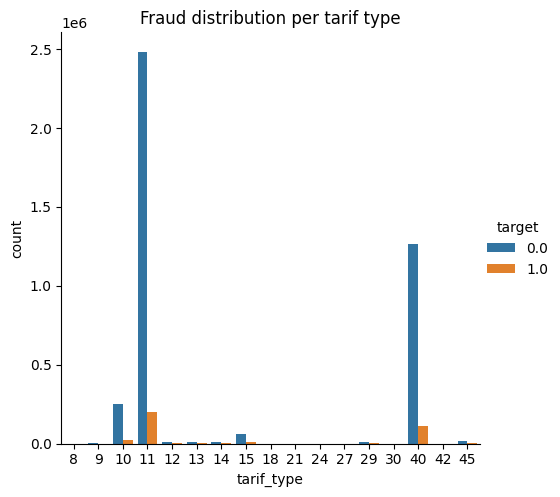

In [46]:
# Histogram
sns.catplot(x="tarif_type", hue="target", kind="count", data=merged_df_train)
plt.title("Fraud distribution per tarif type")
plt.show()

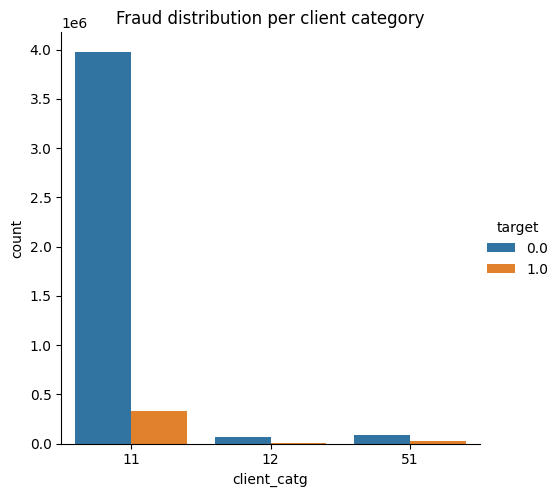

In [44]:
# Histogram
sns.catplot(x="client_catg", hue="target", kind="count", data=merged_df_train)
plt.title("Fraud distribution per client category")
plt.show()

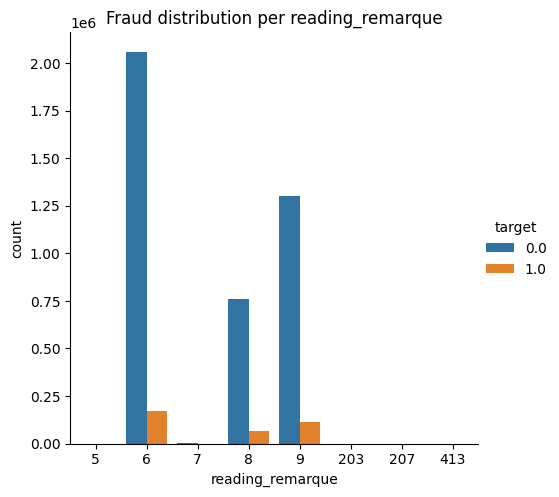

In [65]:
# Histogram
sns.catplot(x="reading_remarque", hue="target", kind="count", data=merged_df_train)
plt.title("Fraud distribution per reading_remarque")
plt.show()

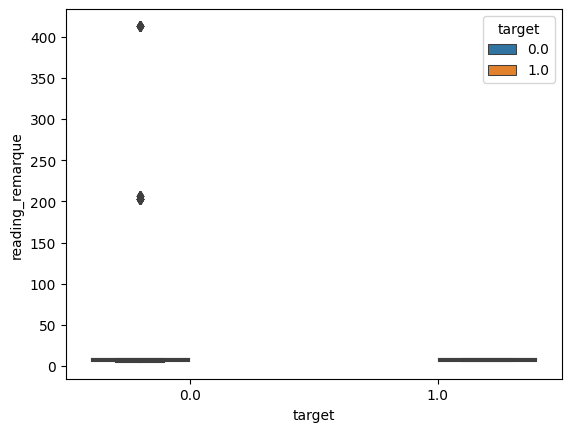

In [69]:
sns.boxplot(data=merged_df_train, x="target", y="reading_remarque", hue="target")
plt.show()

In [71]:
#sns.pairplot(merged_df_train)

In [66]:
merged_df_train["reading_remarque"].value_counts()

reading_remarque
6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: count, dtype: int64

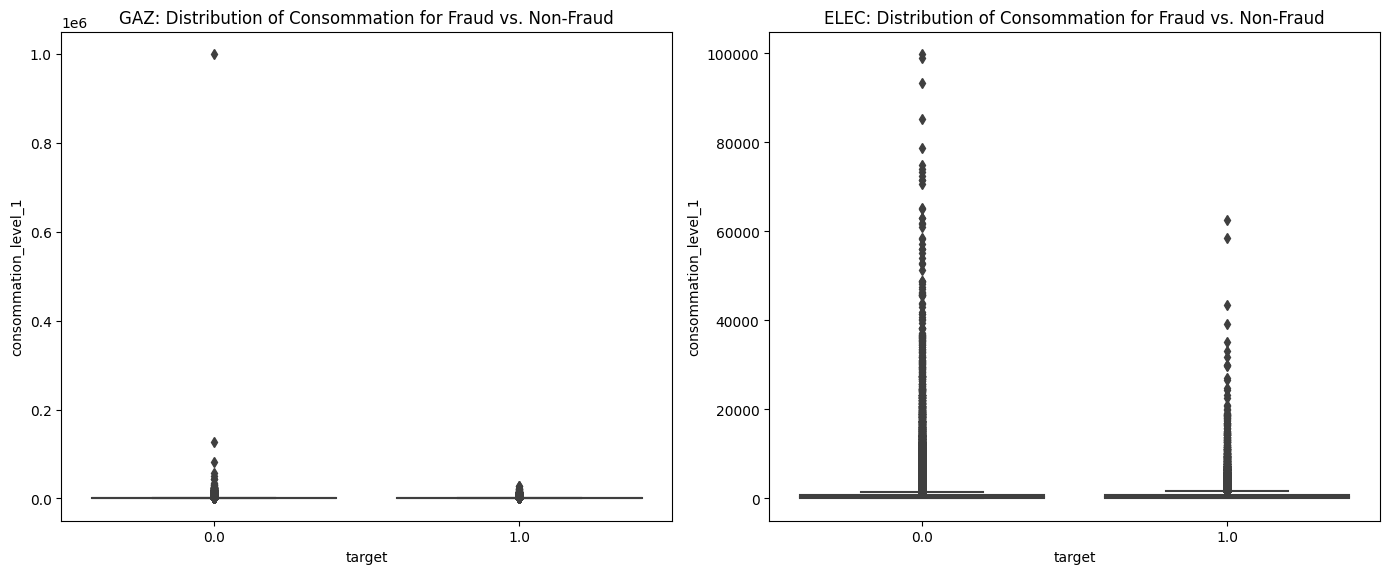

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for GAZ
sns.boxplot(x="target", y="consommation_level_1", data=merged_df_train_gaz, ax=axes[0])
axes[0].set_title("GAZ: Distribution of Consommation for Fraud vs. Non-Fraud")

# Boxplot for ELEC
sns.boxplot(x="target", y="consommation_level_1", data=merged_df_train_elec, ax=axes[1])
axes[1].set_title("ELEC: Distribution of Consommation for Fraud vs. Non-Fraud")

# Layout
plt.tight_layout()
plt.show()

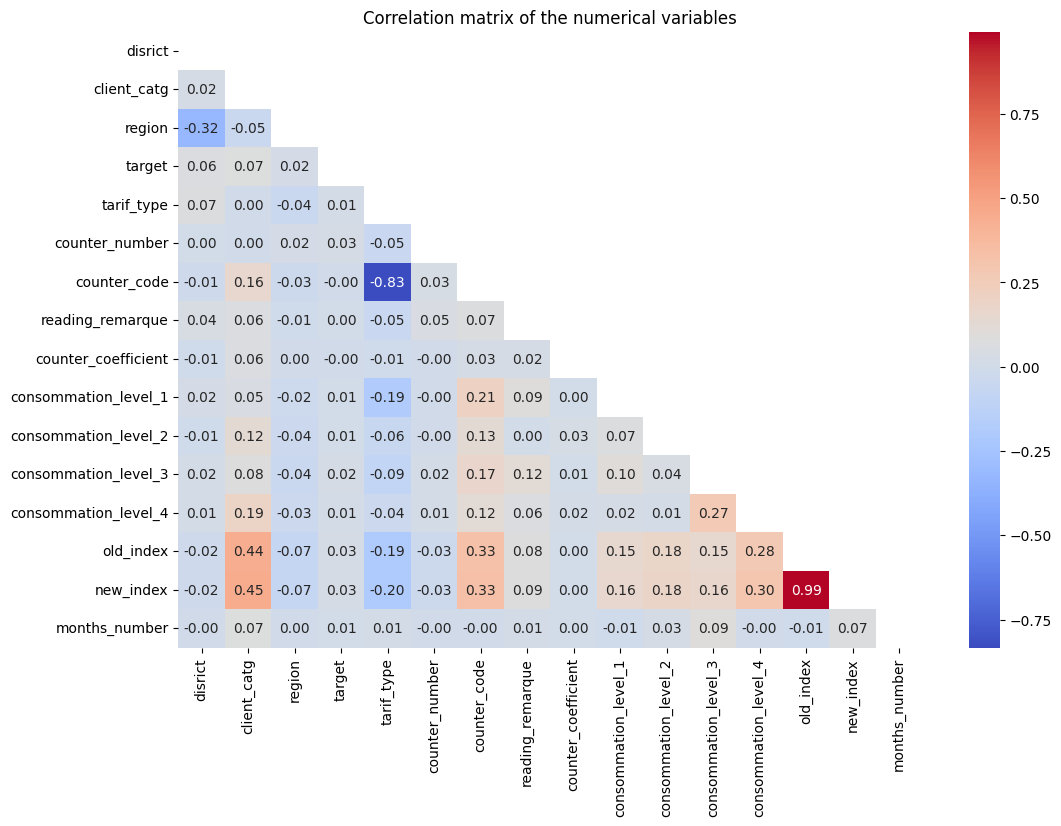

In [37]:
num_merged_df_train = merged_df_train.select_dtypes(include=[np.number])

corr = num_merged_df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix of the numerical variables")
plt.show()